### Basic usage

In [1]:
# this is a development environment hack!
# after pip install of sea_ingest, you'd just import sea_ingest
import __init__ as sea_ingest
from pathlib import Path
import numpy as np

data_path = Path('data')

# these return dictionaries of pandas dataframes (the default)
dfs1 = sea_ingest.read_seamf(data_path/'example_v1.sigmf', tz="America/New_York")
dfs2 = sea_ingest.read_seamf(data_path/'example_v2.sigmf', tz="America/New_York")
dfs3 = sea_ingest.read_seamf(data_path/'example_v3.sigmf', tz="America/New_York")
dfs4 = sea_ingest.read_seamf(data_path/'example_v4.sigmf') # timezone can be automatically identified from v4 onward

# some alternative loading options
arrs4 = sea_ingest.read_seamf(data_path/'example_v4.sigmf', container_cls=np.ndarray, tz="America/New_York")
data4, meta4 = sea_ingest.read_seamf(data_path/'example_v4.sigmf', force_loader_cls=bytes, tz="America/New_York")

### Index name and order consistency check

In [2]:
for df_type in 'pfp', 'psd', 'pvt', 'apd':
    print(f'\n{df_type}:')

    if df_type != 'apd':
        versions = (1,2,3,4)
    else:
        versions = (4,)

    for version in versions:
        name = f'dfs{version}'
        dfs = locals()[name]
        print(name, dfs[df_type].index.names)



pfp:
dfs1 ['datetime', 'frequency', 'capture_statistic', 'detector']
dfs2 ['datetime', 'frequency', 'capture_statistic', 'detector']
dfs3 ['datetime', 'frequency', 'capture_statistic', 'detector']
dfs4 ['datetime', 'frequency', 'capture_statistic', 'detector']

psd:
dfs1 ['datetime', 'frequency', 'capture_statistic']
dfs2 ['datetime', 'frequency', 'capture_statistic']
dfs3 ['datetime', 'frequency', 'capture_statistic']
dfs4 ['datetime', 'frequency', 'capture_statistic']

pvt:
dfs1 ['datetime', 'frequency', 'detector']
dfs2 ['datetime', 'frequency', 'detector']
dfs3 ['datetime', 'frequency', 'detector']
dfs4 ['datetime', 'frequency', 'detector']

apd:
dfs4 ['datetime', 'frequency']


### Column consistency check
The first 5 column index names

In [3]:
for df_type in 'pfp', 'psd', 'pvt', 'apd':
    print(f'\n{df_type}:')

    if df_type != 'apd':
        versions = (1,2,3,4)
    else:
        versions = (4,)

    for version in versions:
        name = f'dfs{version}'
        dfs = locals()[name]
        print(name, dfs[df_type].columns[:5].tolist())



pfp:
dfs1 [0.0, 1.7857142857142855e-05, 3.571428571428571e-05, 5.357142857142857e-05, 7.142857142857142e-05]
dfs2 [0.0, 1.7857142857142855e-05, 3.571428571428571e-05, 5.357142857142857e-05, 7.142857142857142e-05]
dfs3 [0.0, 1.7857142857142855e-05, 3.571428571428571e-05, 5.357142857142857e-05, 7.142857142857142e-05]
dfs4 [0.0, 1.7857142857142855e-05, 3.571428571428571e-05, 5.357142857142857e-05, 7.142857142857142e-05]

psd:
dfs1 [-5000000.0, -4984000.0, -4968000.0, -4952000.0, -4936000.0]
dfs2 [-5000000.0, -4984000.0, -4968000.0, -4952000.0, -4936000.0]
dfs3 [-5000000.0, -4984000.0, -4968000.0, -4952000.0, -4936000.0]
dfs4 [-5000000.0, -4984000.0, -4968000.0, -4952000.0, -4936000.0]

pvt:
dfs1 [0.0, 0.01, 0.02, 0.03, 0.04]
dfs2 [0.0, 0.01, 0.02, 0.03, 0.04]
dfs3 [0.0, 0.01, 0.02, 0.03, 0.04]
dfs4 [0.0, 0.01, 0.02, 0.03, 0.04]

apd:
dfs4 [-180, -179, -178, -177, -176]


### Performance

In [4]:
for version in (1,2,3,4):
    if version < 4:
        tz = "America/New_York"
    else:
        # autodetect timezone in newer files
        tz = None

    filename = data_path/f'example_v{version}.sigmf'

    print(f'======= file version {version} =========')
    print('Metadata only:')
    %timeit -n100 -r6 sea_ingest.read_seamf_meta(filename, tz=tz)

    print('File read raw bytes:')
    %timeit -n10 -r10 sea_ingest.read_seamf(filename, force_loader_cls=None, tz=tz)

    print('File read + metadata scan + unpack numpy.ndarray:')
    %timeit -n10 -r10 sea_ingest.read_seamf(filename, container_cls=np.ndarray, tz=tz)

    print('File read + metadata scan + unpack numpy.ndarray -> pd.DataFrame:')
    %timeit -n10 -r10 sea_ingest.read_seamf(filename, tz=tz)
    print('\n')


======= file version 1 =========
Metadata only:
1.15 ms ± 98.5 µs per loop (mean ± std. dev. of 6 runs, 100 loops each)
File read raw bytes:
5.95 ms ± 444 µs per loop (mean ± std. dev. of 10 runs, 10 loops each)
File read + metadata scan + unpack numpy.ndarray:
7.25 ms ± 686 µs per loop (mean ± std. dev. of 10 runs, 10 loops each)
File read + metadata scan + unpack numpy.ndarray -> pd.DataFrame:
10.1 ms ± 720 µs per loop (mean ± std. dev. of 10 runs, 10 loops each)


======= file version 2 =========
Metadata only:
825 µs ± 91.1 µs per loop (mean ± std. dev. of 6 runs, 100 loops each)
File read raw bytes:
6.25 ms ± 514 µs per loop (mean ± std. dev. of 10 runs, 10 loops each)
File read + metadata scan + unpack numpy.ndarray:
6.75 ms ± 475 µs per loop (mean ± std. dev. of 10 runs, 10 loops each)
File read + metadata scan + unpack numpy.ndarray -> pd.DataFrame:
9.11 ms ± 946 µs per loop (mean ± std. dev. of 10 runs, 10 loops each)


======= file version 3 =========
Metadata only:
739 µs ± 

### Returned data structure

In [5]:
# channel metadata
dfs4["channel_metadata"]

,,overload,iq_capture_duration_ms,cal_noise_figure_dB,cal_gain_dB,cal_temperature_degC,sigan_reference_level_dBm,sigan_attenuation_dB,sigan_preamp_enable
datetime,frequency,,,,,,,,
2023-03-31 16:00:58.735000-06:00,3.555000e+09,False,4000,6.877,22.243,13.4,-25.0,0.0,True
2023-03-31 16:01:05.684000-06:00,3.565000e+09,False,4000,6.304,23.139,13.4,-25.0,0.0,True
2023-03-31 16:01:10.323000-06:00,3.575000e+09,False,4000,6.479,22.847,13.4,-25.0,0.0,True
2023-03-31 16:01:15.319000-06:00,3.585000e+09,False,4000,6.251,23.275,13.4,-25.0,0.0,True
2023-03-31 16:01:20.535000-06:00,3.595000e+09,False,4000,6.81,22.225,13.4,-25.0,0.0,True
2023-03-31 16:01:25.152000-06:00,3.605000e+09,False,4000,6.174,23.547,13.4,-25.0,0.0,True
2023-03-31 16:01:30.948000-06:00,3.615000e+09,False,4000,6.836,22.46,13.4,-25.0,0.0,True
2023-03-31 16:01:35.583000-06:00,3.625000e+09,False,4000,6.657,22.531,13.4,-25.0,0.0,True
2023-03-31 16:01:40.275000-06:00,3.635000e+09,False,4000,6.257,23.438,13.4,-25.0,0.0,True


In [6]:
# power spectral density has a "capture_statistic" index
dfs4['psd'].head(6).iloc[:,:6]

Baseband Frequency (Hz)                                          -5000000.0  \
datetime                         frequency    capture_statistic               
2023-03-31 16:00:58.735000-06:00 3.555000e+09 max                  -157.750   
                                              mean                 -168.375   
2023-03-31 16:01:05.684000-06:00 3.565000e+09 max                  -134.625   
                                              mean                 -151.375   
2023-03-31 16:01:10.323000-06:00 3.575000e+09 max                  -142.875   
                                              mean                 -154.875   

Baseband Frequency (Hz)                                          -4984000.0  \
datetime                         frequency    capture_statistic               
2023-03-31 16:00:58.735000-06:00 3.555000e+09 max                  -155.375   
                                              mean                 -167.125   
2023-03-31 16:01:05.684000-06:00 3.565000e+09 max                  -132.500   
                                              mean                 -150.000   
2023-03-31 16:01:10.323000-06:00 3.575000e+09 max                  -142.625   
                                              mean                 -155.250   

Baseband Frequency (Hz)                                          -4968000.0  \
datetime                         frequency    capture_statistic               
2023-03-31 16:00:58.735000-06:00 3.555000e+09 max                  -154.750   
                                              mean                 -166.625   
2023-03-31 16:01:05.684000-06:00 3.565000e+09 max                  -131.625   
                                              mean                 -149.625   
2023-03-31 16:01:10.323000-06:00 3.575000e+09 max                  -142.625   
                                              mean                 -157.500   

Baseband Frequency (Hz)                                          -4952000.0  \
datetime                         frequency    capture_statistic               
2023-03-31 16:00:58.735000-06:00 3.555000e+09 max                  -155.625   
                                              mean                 -166.625   
2023-03-31 16:01:05.684000-06:00 3.565000e+09 max                  -132.875   
                                              mean                 -149.875   
2023-03-31 16:01:10.323000-06:00 3.575000e+09 max                  -141.625   
                                              mean                 -157.000   

Baseband Frequency (Hz)                                          -4936000.0  \
datetime                         frequency    capture_statistic               
2023-03-31 16:00:58.735000-06:00 3.555000e+09 max                  -156.125   
                                              mean                 -166.625   
2023-03-31 16:01:05.684000-06:00 3.565000e+09 max                  -133.750   
                                              mean                 -150.125   
2023-03-31 16:01:10.323000-06:00 3.575000e+09 max                  -140.875   
                                              mean                 -155.875   

Baseband Frequency (Hz)                                          -4920000.0  
datetime                         frequency    capture_statistic              
2023-03-31 16:00:58.735000-06:00 3.555000e+09 max                  -156.250  
                                              mean                 -166.625  
2023-03-31 16:01:05.684000-06:00 3.565000e+09 max                  -133.000  
                                              mean                 -150.125  
2023-03-31 16:01:10.323000-06:00 3.575000e+09 max                  -140.875  
                                              mean                 -155.625

<AxesSubplot: xlabel='Baseband Frequency (Hz)', ylabel='PSD (dBm/Hz)'>

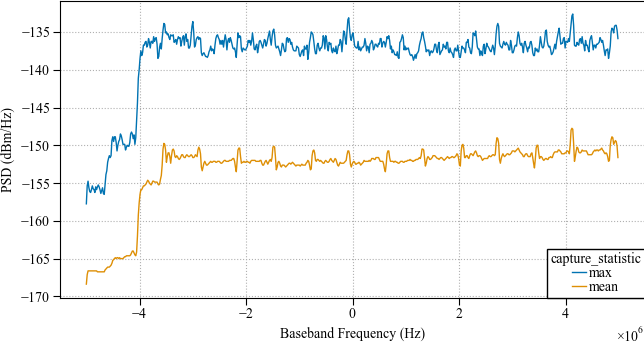

In [7]:
from matplotlib import pyplot as plt
plt.style.use('report.mplstyle')

(
    dfs4['psd']
    .droplevel('datetime')
    .loc(axis=0)[3.555e9]
    .T
    .plot(ylabel='PSD (dBm/Hz)')
)

In [8]:
dfs4['pfp'].head(12).iloc[:,:6]

Frame time elapsed (s)                                                    0.000000  \
datetime                         frequency    capture_statistic detector             
2023-03-31 16:00:58.735000-06:00 3.555000e+09 min               mean      -82.5000   
                                              max               mean      -77.5000   
                                              mean              mean      -80.1250   
                                              min               max       -75.5625   
                                              max               max       -68.2500   
                                              mean              max       -71.6250   
2023-03-31 16:01:05.684000-06:00 3.565000e+09 min               mean      -79.3125   
                                              max               mean      -74.4375   
                                              mean              mean      -76.6250   
                                              min               max       -70.9375   
                                              max               max       -63.7500   
                                              mean              max       -68.0000   

Frame time elapsed (s)                                                    0.000018  \
datetime                         frequency    capture_statistic detector             
2023-03-31 16:00:58.735000-06:00 3.555000e+09 min               mean      -82.3125   
                                              max               mean      -78.3125   
                                              mean              mean      -79.9375   
                                              min               max       -75.4375   
                                              max               max       -67.1250   
                                              mean              max       -71.5625   
2023-03-31 16:01:05.684000-06:00 3.565000e+09 min               mean      -79.3750   
                                              max               mean      -74.1250   
                                              mean              mean      -76.8125   
                                              min               max       -70.5625   
                                              max               max       -64.3125   
                                              mean              max       -67.8750   

Frame time elapsed (s)                                                    0.000036  \
datetime                         frequency    capture_statistic detector             
2023-03-31 16:00:58.735000-06:00 3.555000e+09 min               mean      -83.0000   
                                              max               mean      -78.0000   
                                              mean              mean      -80.0625   
                                              min               max       -75.0000   
                                              max               max       -67.0000   
                                              mean              max       -71.5000   
2023-03-31 16:01:05.684000-06:00 3.565000e+09 min               mean      -80.0625   
                                              max               mean      -74.7500   
                                              mean              mean      -77.2500   
                                              min               max       -71.4375   
                                              max               max       -65.0000   
                                              mean              max       -68.2500   

Frame time elapsed (s)                                                    0.000054  \
datetime                         frequency    capture_statistic detector             
2023-03-31 16:00:58.735000-06:00 3.555000e+09 min               mean      -90.5000   
                                              max               mean      -81.1250   
                                         

<AxesSubplot: xlabel='Frame time elapsed (s)', ylabel='PFP (dBm/10MHz)'>

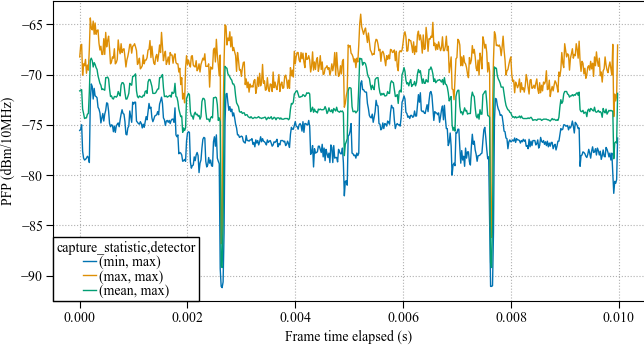

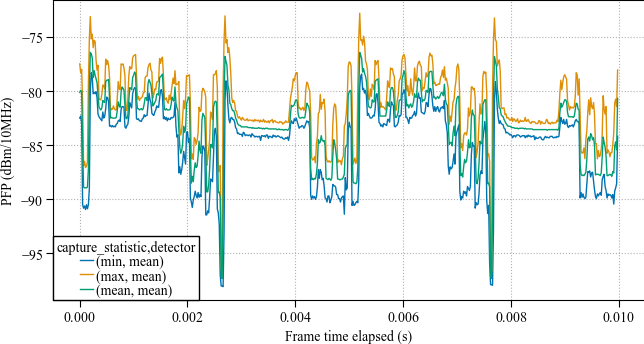

In [9]:
fig, ax = plt.subplots()
(
    dfs4['pfp']
    .loc(axis=0)[:,3.555e9,:,'max']  # Before v4, change "max" to "peak"
    .droplevel(['datetime','frequency'])
    .T
    .plot(ax=ax, ylabel='PFP (dBm/10MHz)')
)

fig, ax = plt.subplots()
(
    dfs4['pfp']
    .loc(axis=0)[:,3.555e9,:,'mean']  # Before v4, chane "mean" to "rms"
    .droplevel(['datetime','frequency'])
    .T
    .plot(ax=ax, ylabel='PFP (dBm/10MHz)')
)

In [10]:
dfs4['apd'].head(12).iloc[:,:8]

,Channel Power (dBm/10MHz),-180,-179,-178,-177,-176,-175,-174,-173
datetime,frequency,,,,,,,,
2023-03-31 16:00:58.735000-06:00,3.555000e+09,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2023-03-31 16:01:05.684000-06:00,3.565000e+09,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2023-03-31 16:01:10.323000-06:00,3.575000e+09,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2023-03-31 16:01:15.319000-06:00,3.585000e+09,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2023-03-31 16:01:20.535000-06:00,3.595000e+09,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2023-03-31 16:01:25.152000-06:00,3.605000e+09,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2023-03-31 16:01:30.948000-06:00,3.615000e+09,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2023-03-31 16:01:35.583000-06:00,3.625000e+09,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2023-03-31 16:01:40.275000-06:00,3.635000e+09,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


1.0   -180
1.0   -179
1.0   -178
1.0   -177
1.0   -176
      ... 
NaN    -34
NaN    -33
NaN    -32
NaN    -31
NaN    -30
Length: 151, dtype: int64

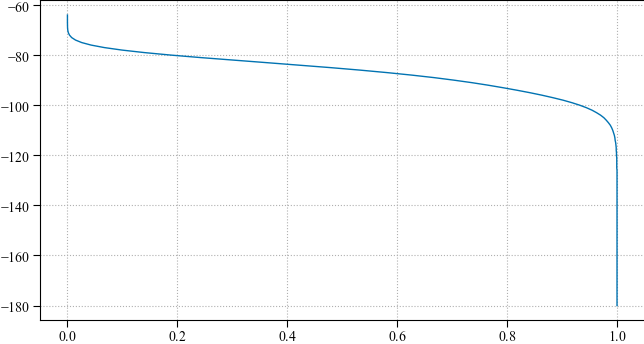

In [11]:
import pandas as pd
fig, ax = plt.subplots()

apd = dfs4['apd'].loc(axis=0)[:,3.555e9]

# Crude APD plot: does not apply Rayleigh axis scaling
# This just shows that the index/data are reversed from what would be expected

# one solution is to create a new series, swapping the axis for the channel data:
apd = pd.Series(apd.columns.values, index=apd.values[0])
apd.plot()
apd


In [12]:
dfs4['pfp']

Frame time elapsed (s)                                                    0.000000  \
datetime                         frequency    capture_statistic detector             
2023-03-31 16:00:58.735000-06:00 3.555000e+09 min               mean     -82.50000   
                                              max               mean     -77.50000   
                                              mean              mean     -80.12500   
                                              min               max      -75.56250   
                                              max               max      -68.25000   
...                                                                            ...   
2023-03-31 16:02:10.528000-06:00 3.695000e+09 max               mean     -64.18750   
                                              mean              mean     -67.12500   
                                              min               max      -52.71875   
                                              max               max      -43.37500   
                                              mean              max      -47.84375   

Frame time elapsed (s)                                                    0.000018  \
datetime                         frequency    capture_statistic detector             
2023-03-31 16:00:58.735000-06:00 3.555000e+09 min               mean     -82.31250   
                                              max               mean     -78.31250   
                                              mean              mean     -79.93750   
                                              min               max      -75.43750   
                                              max               max      -67.12500   
...                                                                            ...   
2023-03-31 16:02:10.528000-06:00 3.695000e+09 max               mean     -64.56250   
                                              mean              mean     -67.12500   
                                              min               max      -53.68750   
                                              max               max      -43.46875   
                                              mean              max      -47.90625   

Frame time elapsed (s)                                                    0.000036  \
datetime                         frequency    capture_statistic detector             
2023-03-31 16:00:58.735000-06:00 3.555000e+09 min               mean     -83.00000   
                                              max               mean     -78.00000   
                                              mean              mean     -80.06250   
                                              min               max      -75.00000   
                                              max               max      -67.00000   
...                                                                            ...   
2023-03-31 16:02:10.528000-06:00 3.695000e+09 max               mean     -63.68750   
                                              mean              mean     -67.25000   
                                              min               max      -53.50000   
                                              max               max      -43.25000   
                                              mean              max      -47.78125   

Frame time elapsed (s)                                                    0.000054  \
datetime                         frequency    capture_statistic detector             
2023-03-31 16:00:58.735000-06:00 3.555000e+09 min               mean     -90.50000   
                                              max               mean     -81.12500   
                                              mean              mean     -84.93750   
                                              min               max      -77.62500   
                                              max               max      -70.06250   
...                                      